In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import collections

max_iter = 20
epsilon = 1.0

def fromBRGtoRGB(img):
    # BGR to RGB
    return img[:, :, ::-1]


def colorQuantization(data, shape,
                      # criteria
                      max_iter = 20,
                      epsilon = 1.0,
                      criteria=(cv.TERM_CRITERIA_EPS + \
                                cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon),
                      # cluster
                      K=3
                      ):

    compactness, label, center = cv.kmeans(
        data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

    print('compactness: ', compactness)
    print('label: ', label.shape)
    print('center: ', center.shape)

    # img to k center colors
    # convert center float32 to uint8
    center = np.uint8(center)

    # replace pixel values with their center value
    imgNew = center[label.flatten()]
    imgNew = imgNew.reshape(shape)

    # color distribution
    legendWidth = imgNew.shape[1]
    legendHeight = 70
    # white background image
    imgColorLegend = np.ones(
        (legendHeight, legendWidth, 3), dtype='uint8') * 255

    # 
    total = imgNew.shape[0] * imgNew.shape[1]
    counter = collections.Counter(label.flatten())
    start = 0
    for key, value in counter.items():
        colorWidth = value * legendWidth // total
        # draw rectangle
        end = start + colorWidth
        ptTopLeft = (start, 0)
        ptBottomRight = (end, 50)
        color = center[key].tolist()
        cv.rectangle(imgColorLegend, ptTopLeft, ptBottomRight, color, -1)
        start = end

    # stack legend and image
    imgNew = np.vstack((imgColorLegend, imgNew))

    return imgNew, compactness, label, center


def plotImage(img, subplotValue, title):
    imgRGB = fromBRGtoRGB(img)
    plt.subplot(subplotValue)
    plt.imshow(imgRGB)
    plt.title(title)

compactness:  388277746.7795013
label:  (187125, 1)
center:  (3, 3)
compactness:  173976624.7819554
label:  (187125, 1)
center:  (5, 3)
compactness:  63203866.44757146
label:  (187125, 1)
center:  (10, 3)
compactness:  37365639.88507837
label:  (187125, 1)
center:  (20, 3)
compactness:  24089730.626311377
label:  (187125, 1)
center:  (40, 3)


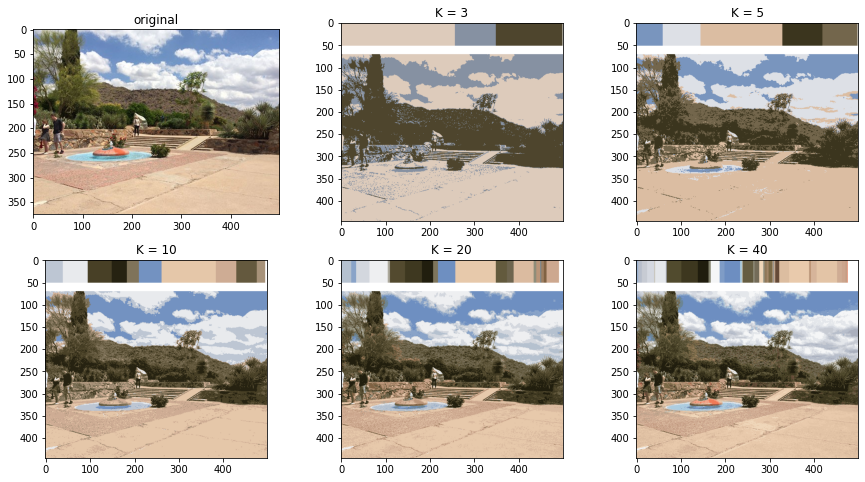

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = r'C:\Users\user\Documents\GitHub\cv-1\essential\assets\ca.jpg'

img = cv.imread(filename)


plt.figure(figsize=(15, 8))

# plot img
plotImage(img, 231, 'original')

# img to data (2 D)
data = np.float32(img).reshape((-1, 3))

max_iter = 20
epsilon = 1.0
criteria = (cv.TERM_CRITERIA_EPS +
            cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# K = 3
imgNew, compactness, label, center = colorQuantization(data, img.shape)
# plot imgNew with K=3
plotImage(imgNew, 232, 'K = 3')

# K = 5
K = 5
imgNew, compactness, label, center = colorQuantization(data, img.shape, max_iter=20, epsilon=1.0,
                                                       criteria=(cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon), K=K)
# plot imgNew
plotImage(imgNew, 233, f'K = {K}')


# K
K = 10
imgNew, compactness, label, center = colorQuantization(data, img.shape, K=K)
# plot imgNew
plotImage(imgNew, 234, f'K = {K}')

# K
K = 20
imgNew, compactness, label, center = colorQuantization(data, img.shape, K=K)
# plot imgNew
plotImage(imgNew, 235, f'K = {K}')

# K
K = 40
imgNew, compactness, label, center = colorQuantization(data, img.shape, K=K)
# plot imgNew
plotImage(imgNew, 236, f'K = {K}')

plt.tight_layout()
plt.show()
